# segformer_mit_b0

本来是想用b3的，毕竟效果会好一些，但是呢考虑到轻量化一些，就使用这个b0，参数量这么小能有这个效果

## 数据处理

In [1]:
import io
import os
import numpy as np
from PIL import Image as PilImage
import torch
from torch.utils.data import DataLoader
from torchvision import transforms as T
from datapre import get_kt_datasets

rootDir = "C:/Users/29779/Desktop/DL"
train_set, val_set, test_set = get_kt_datasets(rootDir)

img, label = train_set[1]
print(label.shape)

len(train_set),len(test_set),  len(val_set)

torch.Size([384, 384])


(4532, 1416, 1134)

In [2]:
# 使用 DataLoader 加载数据集
train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
val_loader = DataLoader(val_set, batch_size=2, shuffle=False)
test_loader = DataLoader(test_set, batch_size=2, shuffle=False)

## 训练模型

In [8]:
import torch.nn as nn
import torch.optim as optim
from Segformer import segformer_mit_b0
from train import train_validate_model
from torch.optim.lr_scheduler import OneCycleLR
from utils import meanIoU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

criterion = nn.CrossEntropyLoss()
model_name = "people_detect_last"
epochs = 25   #先训练了20轮
num_classes = 2
lr = 1e-4

model = segformer_mit_b0(in_channels=3, num_classes=num_classes).to(device)
model.load_state_dict(torch.load("C:/Users/29779/Desktop/DL/results/people_detect.pt"))
# model.load_state_dict(torch.load("C:/Users/29779/Desktop/DL/results/segformer_b0_backbone_weights.pth"), strict=False)

optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = OneCycleLR(optimizer, max_lr= lr, epochs = epochs, 
                        steps_per_epoch = len(train_loader), div_factor=10)

Starting 1 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:02<00:00,  1.56it/s]


Epoch: 1, trainLoss:2.14545, validationLoss:0.79132, meanIoU: 0.55
Starting 2 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:54<00:00,  1.60it/s]


Epoch: 2, trainLoss:1.10964, validationLoss:0.92354, meanIoU: 0.49
Starting 3 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:03<00:00,  1.56it/s]


Epoch: 3, trainLoss:0.93500, validationLoss:0.67846, meanIoU: 0.54
Starting 4 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:03<00:00,  1.56it/s]


Epoch: 4, trainLoss:0.78250, validationLoss:0.50345, meanIoU: 0.60
Starting 5 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:53<00:00,  1.60it/s]


Epoch: 5, trainLoss:0.57414, validationLoss:0.42224, meanIoU: 0.69
Starting 6 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:49<00:00,  1.62it/s]


Epoch: 6, trainLoss:0.45231, validationLoss:0.38252, meanIoU: 0.71
Starting 7 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:50<00:00,  1.62it/s]


Epoch: 7, trainLoss:0.38961, validationLoss:0.34205, meanIoU: 0.73
Starting 8 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:50<00:00,  1.62it/s]


Epoch: 8, trainLoss:0.34789, validationLoss:0.31783, meanIoU: 0.75
Starting 9 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:50<00:00,  1.62it/s]


Epoch: 9, trainLoss:0.31501, validationLoss:0.29124, meanIoU: 0.76
Starting 10 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:50<00:00,  1.62it/s]


Epoch: 10, trainLoss:0.28993, validationLoss:0.27154, meanIoU: 0.77
Starting 11 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:52<00:00,  1.61it/s]


Epoch: 11, trainLoss:0.26614, validationLoss:0.24023, meanIoU: 0.80
Starting 12 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:53<00:00,  1.60it/s]


Epoch: 12, trainLoss:0.24608, validationLoss:0.28849, meanIoU: 0.76
Starting 13 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:52<00:00,  1.61it/s]


Epoch: 13, trainLoss:0.23051, validationLoss:0.24159, meanIoU: 0.80
Starting 14 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:51<00:00,  1.61it/s]


Epoch: 14, trainLoss:0.21538, validationLoss:0.20443, meanIoU: 0.83
Starting 15 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:53<00:00,  1.60it/s]


Epoch: 15, trainLoss:0.20324, validationLoss:0.20278, meanIoU: 0.83
Starting 16 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:51<00:00,  1.61it/s]


Epoch: 16, trainLoss:0.19311, validationLoss:0.19524, meanIoU: 0.84
Starting 17 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:51<00:00,  1.61it/s]


Epoch: 17, trainLoss:0.18341, validationLoss:0.19249, meanIoU: 0.84
Starting 18 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:50<00:00,  1.62it/s]


Epoch: 18, trainLoss:0.17949, validationLoss:0.19083, meanIoU: 0.84
Starting 19 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:53<00:00,  1.60it/s]


Epoch: 19, trainLoss:0.17593, validationLoss:0.18832, meanIoU: 0.85
Starting 20 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:51<00:00,  1.61it/s]


Epoch: 20, trainLoss:0.17386, validationLoss:0.18726, meanIoU: 0.85


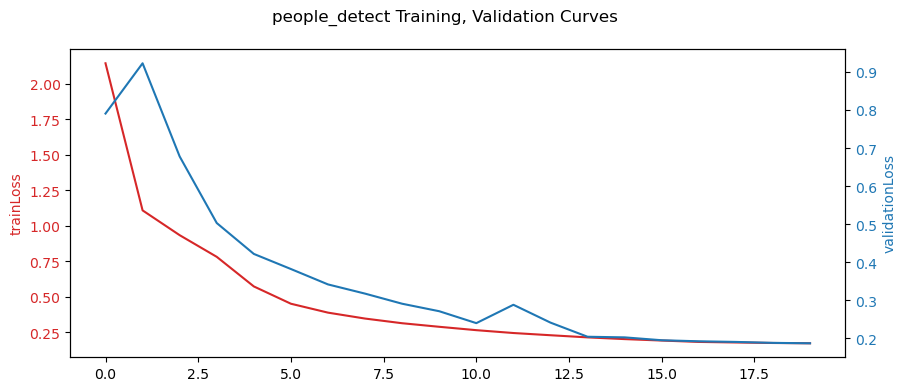

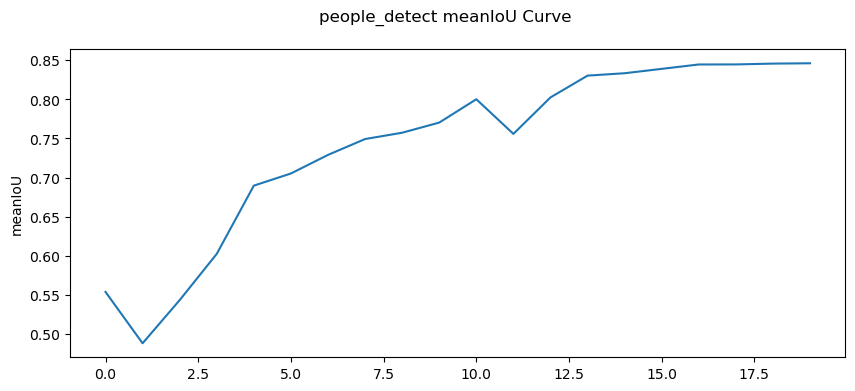

,epoch,trainLoss,validationLoss,meanIoU
0,0,2.145454,0.791320,0.553894
1,1,1.109636,0.923544,0.488263
2,2,0.934998,0.678461,0.543422
3,3,0.782496,0.503446,0.602517
4,4,0.574138,0.422235,0.689695
5,5,0.452313,0.382524,0.705216
6,6,0.389609,0.342046,0.728966
7,7,0.347888,0.317832,0.749242
8,8,0.315008,0.291244,0.757292
9,9,0.289926,0.271544,0.770271


In [4]:
train_validate_model(model, epochs, model_name, criterion, optimizer, 
                    device, train_loader, val_loader, meanIoU, 'meanIoU',
                    num_classes, lr_scheduler = scheduler, output_path = "results")

## 梅开二度
主要是跑20轮看着meanIoU挺高，但是可视化时发现有些复杂的效果确实不好，后面发现hh

Starting 1 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:53<00:00,  1.60it/s]


Epoch: 1, trainLoss:0.17870, validationLoss:0.18974, meanIoU: 0.85
Starting 2 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:49<00:00,  1.62it/s]


Epoch: 2, trainLoss:0.17799, validationLoss:0.19082, meanIoU: 0.84
Starting 3 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:02<00:00,  1.56it/s]


Epoch: 3, trainLoss:0.18469, validationLoss:0.20751, meanIoU: 0.83
Starting 4 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:55<00:00,  1.59it/s]


Epoch: 4, trainLoss:0.18859, validationLoss:0.20745, meanIoU: 0.83
Starting 5 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:49<00:00,  1.62it/s]


Epoch: 5, trainLoss:0.19922, validationLoss:0.20980, meanIoU: 0.83
Starting 6 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:48<00:00,  1.63it/s]


Epoch: 6, trainLoss:0.19623, validationLoss:0.20316, meanIoU: 0.83
Starting 7 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:49<00:00,  1.62it/s]


Epoch: 7, trainLoss:0.19794, validationLoss:0.20247, meanIoU: 0.84
Starting 8 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:49<00:00,  1.62it/s]


Epoch: 8, trainLoss:0.19895, validationLoss:0.18974, meanIoU: 0.85
Starting 9 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:54<00:00,  1.60it/s]


Epoch: 9, trainLoss:0.18772, validationLoss:0.19687, meanIoU: 0.84
Starting 10 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:54<00:00,  1.60it/s]


Epoch: 10, trainLoss:0.17762, validationLoss:0.18656, meanIoU: 0.85
Starting 11 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:58<00:00,  1.58it/s]


Epoch: 11, trainLoss:0.17124, validationLoss:0.18643, meanIoU: 0.85
Starting 12 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:11<00:00,  1.53it/s]


Epoch: 12, trainLoss:0.16406, validationLoss:0.18091, meanIoU: 0.86
Starting 13 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:59<00:00,  1.58it/s]


Epoch: 13, trainLoss:0.15523, validationLoss:0.17964, meanIoU: 0.86
Starting 14 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:59<00:00,  1.58it/s]


Epoch: 14, trainLoss:0.14727, validationLoss:0.17209, meanIoU: 0.86
Starting 15 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:02<00:00,  1.57it/s]


Epoch: 15, trainLoss:0.14075, validationLoss:0.17160, meanIoU: 0.86
Starting 16 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:01<00:00,  1.57it/s]


Epoch: 16, trainLoss:0.13333, validationLoss:0.16409, meanIoU: 0.87
Starting 17 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:58<00:00,  1.58it/s]


Epoch: 17, trainLoss:0.12419, validationLoss:0.15607, meanIoU: 0.88
Starting 18 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:52<00:00,  1.61it/s]


Epoch: 18, trainLoss:0.11768, validationLoss:0.17066, meanIoU: 0.87
Starting 19 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:00<00:00,  1.57it/s]


Epoch: 19, trainLoss:0.11254, validationLoss:0.16117, meanIoU: 0.88
Starting 20 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:59<00:00,  1.58it/s]


Epoch: 20, trainLoss:0.10815, validationLoss:0.15787, meanIoU: 0.88
Starting 21 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:01<00:00,  1.57it/s]


Epoch: 21, trainLoss:0.10489, validationLoss:0.15739, meanIoU: 0.88
Starting 22 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:03<00:00,  1.56it/s]


Epoch: 22, trainLoss:0.10248, validationLoss:0.15647, meanIoU: 0.88
Starting 23 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [06:01<00:00,  1.57it/s]


Epoch: 23, trainLoss:0.09988, validationLoss:0.15441, meanIoU: 0.88
Starting 24 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:55<00:00,  1.59it/s]


Epoch: 24, trainLoss:0.09891, validationLoss:0.15725, meanIoU: 0.88
Starting 25 epoch ...


100%|███████████████████████████████████████████████████████████████████████████████| 567/567 [05:50<00:00,  1.62it/s]


Epoch: 25, trainLoss:0.09835, validationLoss:0.15631, meanIoU: 0.88


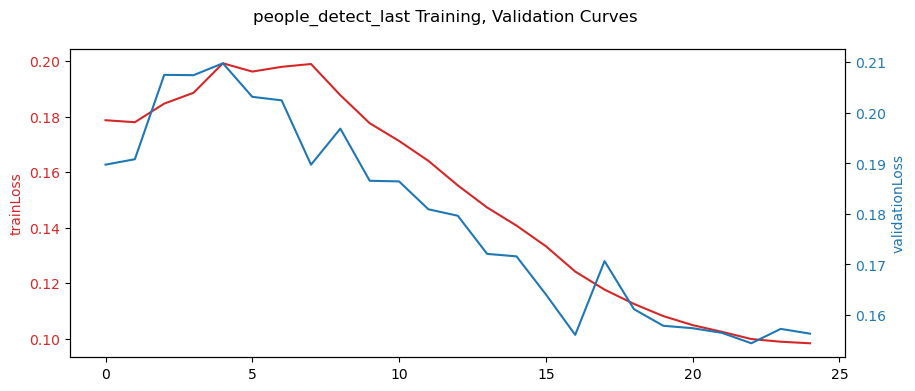

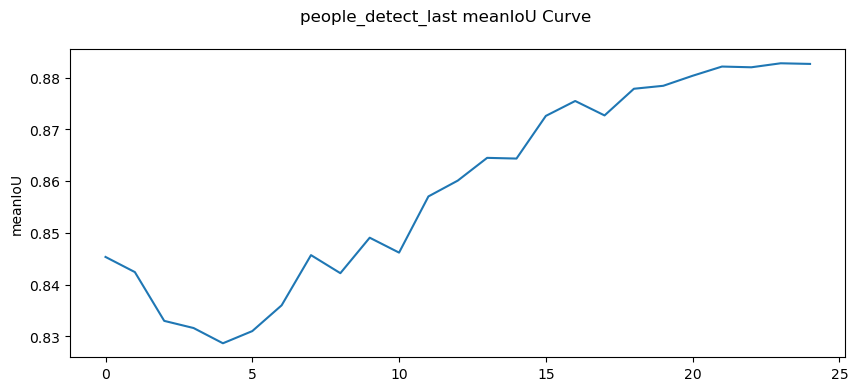

,epoch,trainLoss,validationLoss,meanIoU
0,0,0.178703,0.189743,0.845349
1,1,0.177992,0.190819,0.842420
2,2,0.184688,0.207507,0.832989
3,3,0.188593,0.207447,0.831605
4,4,0.199219,0.209800,0.828657
5,5,0.196230,0.203162,0.831013
6,6,0.197935,0.202467,0.835997
7,7,0.198954,0.189737,0.845699
8,8,0.187720,0.196871,0.842207
9,9,0.177622,0.186557,0.849067


In [4]:
train_validate_model(model, epochs, model_name, criterion, optimizer, 
                    device, train_loader, val_loader, meanIoU, 'meanIoU',
                    num_classes, lr_scheduler = scheduler, output_path = "results")

## 测试模型

In [5]:
from train import evaluate_model

evaluate_model(model, test_loader, criterion, meanIoU, num_classes, device)

100%|███████████████████████████████████████████████████████████████████████████████| 708/708 [07:23<00:00,  1.60it/s]


(0.1624527033615731, 0.8827517559095062)

## 可视化预测对比

取test_txt中的任一张图片放入pre_txt中

In [3]:
from Segformer import segformer_mit_b0
from predict import Predict
from datapre import get_pre_datasets
from train import evaluate_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
num_classes = 2
model = segformer_mit_b0(in_channels=3, num_classes=num_classes).to(device)
model.load_state_dict(torch.load("C:/Users/29779/Desktop/DL/results/people_detect_last.pt"))

pre_set = get_pre_datasets(rootDir)
print(len(pre_set))
pre_loader = DataLoader(pre_set, batch_size=2, shuffle=False)

all_pre = Predict(model, pre_loader, device)

1


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.39s/it]


In [4]:
all_pre[0].shape

torch.Size([1, 2, 384, 384])

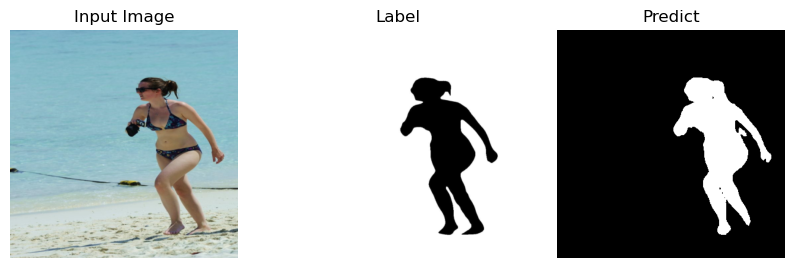

In [5]:
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
IMAGE_SIZE = (384, 384)

with open('data/koto/predict_list.txt', 'r') as f:
    for line in f.readlines():
        img_path, label_path = line.strip().split(' ')

        resize_t = T.Compose([T.Resize(IMAGE_SIZE)])
        img = resize_t(PilImage.open(img_path))
        label = resize_t(PilImage.open(label_path))

        img = np.array(img).astype('uint8')
        label = np.array(label).astype('uint8')

        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Input Image')

        plt.subplot(1, 3, 2)
        plt.imshow(label, cmap='gray')
        plt.axis('off')
        plt.title('Label')

        data = all_pre[0][0].permute(1, 2, 0)
        mask = torch.argmax(data, dim=-1)

        # Move the tensor from GPU to CPU and convert to NumPy array
        mask_np = mask.cpu().numpy()

        plt.subplot(1, 3, 3)
        plt.imshow(mask_np.astype('uint8'), cmap='gray')
        plt.axis('off')
        plt.title('Predict')

plt.show()

## 换背景色

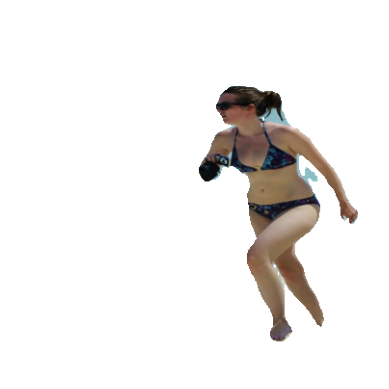

In [31]:
# 创建背景图，此处选用白色背景
bg = np.full([384, 384, 3], 255)

# 将预测结果的单通道扩展为RGB三通道
mask_rgb = []
for i in range(3):
    mask_rgb.append(mask.cpu().numpy())


photo_mask = np.array(mask_rgb).transpose((1, 2, 0))

# 抠背景
photo_bg = bg * (1 - photo_mask)

# 抠人像
photo_per = img * photo_mask

# 将背景和人像结合
photo = photo_bg + photo_per

plt.imshow(photo.astype('uint8'))
plt.axis('off')
plt.show()

## 扩展数据集测试

In [10]:
import os
from datapre import get_Hk_datasets

folder_path = 'C:/Users/29779/Desktop/DL/data/HKdataset'
train_set, test_set = get_Hk_datasets(folder_path)

img, label = train_set[1]
print(label.shape)

len(train_set), len(test_set)

torch.Size([384, 384])


(1700, 300)

In [11]:
# 使用 DataLoader 加载数据集
train1_loader = DataLoader(train_set, batch_size=2, shuffle=True)
test1_loader = DataLoader(test_set, batch_size=2, shuffle=False)

### 测试集上的效果

In [12]:
from train import evaluate_model
from Segformer import segformer_mit_b0
from predict import Predict
from datapre import get_pre_datasets

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
num_classes = 2
model = segformer_mit_b0(in_channels=3, num_classes=num_classes).to(device)
model.load_state_dict(torch.load("C:/Users/29779/Desktop/DL/results/people_detect_last.pt"))

evaluate_model(model, test1_loader, criterion, meanIoU, num_classes, device)

100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [01:32<00:00,  1.63it/s]


(0.3076921564340591, 0.8590466768846969)

### 训练集的效果

In [13]:
evaluate_model(model, train1_loader, criterion, meanIoU, num_classes, device)

100%|███████████████████████████████████████████████████████████████████████████████| 850/850 [09:06<00:00,  1.56it/s]


(0.13249889801311143, 0.9116096628092493)

效果都还可以，完结撒花

参考资料：https://github.com/hankkkwu/SegFormer-pytorch

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.56, 0.406), std=(0.229, 0.224, 0.225))
])